# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
pip install citipy

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
from scipy.stats import linregress
from sklearn import datasets

# Import API key
from api_keys import weather_api_key

# # Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)


606

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
base_url = "http://api.openweathermap.org/data/2.5/weather?"
api_key = weather_api_key
cities_list = []

#declaring loop variables
record_number = 0 
set_number = 1

#NOT SURE HOW TO SET FARENHEIT OR MPH

print("Beginning Data Retrieval")
print("_________________________________________")


for weather in cities:
    # Build query URL based on current element in units
    query_url = base_url + "appid=" + api_key + "&q=" + weather + "&units=imperial"
    
    #get weather data    
    city_r = requests.get(query_url)
    city_json = city_r.json()
    # print(city_json) to view data

    try:
        city_json = city_r.json()
        name = city_json["name"]
        lat = city_json["coord"]["lat"]
        lon = city_json["coord"]["lon"]
        maxtemp = city_json["main"]["temp_max"]
        humidity = city_json["main"]["humidity"]
        clouds = city_json["clouds"]["all"]
        windspeed = city_json["wind"]["speed"]
        country = city_json["sys"]["country"]
        date = city_json["dt"]
        
        #50 entries per record
        if record_number >=49:
            record_number = 1
            #loop to add cities to sets of 50
            set_number += 1
            
            cities_list.append([name, lat, lon, maxtemp, 
                                humidity, clouds, windspeed, 
                                country, date])
        else:
            record_number += 1
            cities_list.append([name, lat, lon, maxtemp, 
                                humidity, clouds, windspeed, 
                                country, date])
            print(f"Processing Record {record_number} of Set {set_number}| {name}")
            
    except(KeyError):
            print("City not found")
    
    
print("Data Retrieval Complete")
print("_________________________________________")   


Beginning Data Retrieval
_________________________________________
Processing Record 1 of Set 1| Sorong
Processing Record 2 of Set 1| Bambous Virieux
Processing Record 3 of Set 1| Hobart
Processing Record 4 of Set 1| Vaini
Processing Record 5 of Set 1| Albany
Processing Record 6 of Set 1| Ushuaia
Processing Record 7 of Set 1| Pisco
Processing Record 8 of Set 1| Antofagasta
Processing Record 9 of Set 1| George Town
City not found
Processing Record 10 of Set 1| Horta
Processing Record 11 of Set 1| Punta Arenas
Processing Record 12 of Set 1| College
Processing Record 13 of Set 1| Back Mountain
City not found
Processing Record 14 of Set 1| Pevek
Processing Record 15 of Set 1| East London
Processing Record 16 of Set 1| Zyryanka
City not found
Processing Record 17 of Set 1| Carnarvon
Processing Record 18 of Set 1| Boralday
Processing Record 19 of Set 1| Cape Town
Processing Record 20 of Set 1| Castro
Processing Record 21 of Set 1| Rawson
Processing Record 22 of Set 1| Katsuura
Processing Rec

Processing Record 6 of Set 5| Port Hedland
Processing Record 7 of Set 5| Novikovo
Processing Record 8 of Set 5| Curillo
Processing Record 9 of Set 5| Barão de Melgaço
Processing Record 10 of Set 5| Telfs
Processing Record 11 of Set 5| Yelizovo
Processing Record 12 of Set 5| Burnie
Processing Record 13 of Set 5| Port Hardy
Processing Record 14 of Set 5| Bredasdorp
Processing Record 15 of Set 5| Sabang
Processing Record 16 of Set 5| Acapulco de Juárez
Processing Record 17 of Set 5| Faanui
Processing Record 18 of Set 5| Ancud
Processing Record 19 of Set 5| Piaçabuçu
Processing Record 20 of Set 5| Husavik
Processing Record 21 of Set 5| Neuquén
Processing Record 22 of Set 5| Flinders
Processing Record 23 of Set 5| Itarema
Processing Record 24 of Set 5| Teguise
Processing Record 25 of Set 5| Enshi
Processing Record 26 of Set 5| Inyonga
Processing Record 27 of Set 5| Mahon
Processing Record 28 of Set 5| Daitari
Processing Record 29 of Set 5| Coyhaique
Processing Record 30 of Set 5| Booué
Proc

Processing Record 14 of Set 9| La Primavera
Processing Record 15 of Set 9| Shingū
Processing Record 16 of Set 9| Taoudenni
Processing Record 17 of Set 9| Grand Gaube
Processing Record 18 of Set 9| Ponta do Sol
Processing Record 19 of Set 9| Niamey
Processing Record 20 of Set 9| Okhotsk
Processing Record 21 of Set 9| Chu
Processing Record 22 of Set 9| Mopipi
Processing Record 23 of Set 9| Zarinsk
Processing Record 24 of Set 9| Kabompo
Processing Record 25 of Set 9| Ust'-Ishim
Processing Record 26 of Set 9| Comarapa
City not found
Processing Record 27 of Set 9| San Policarpo
City not found
Processing Record 28 of Set 9| Tiznit Province
Processing Record 29 of Set 9| Clyde River
Processing Record 30 of Set 9| Najrān
Processing Record 31 of Set 9| Skjervøy
Processing Record 32 of Set 9| Bandarbeyla
Processing Record 33 of Set 9| Hamilton
Processing Record 34 of Set 9| Paracuru
Processing Record 35 of Set 9| Williamsburg
Processing Record 36 of Set 9| Shubarkuduk
City not found
Processing R

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
weather_df = pd.DataFrame(cities_list, columns = ["City", "Lat", "Lng", "Max Temp",
                                                  "Humidity", "Cloudiness", "Wind Speed", "Country", "Date"])

weather_df.to_csv("output_data/Data Frame.csv")
weather_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Sorong,-0.8833,131.2500,85.15,69,14,5.30,ID,1613104583
1,Bambous Virieux,-20.3428,57.7575,84.00,65,40,9.22,MU,1613104540
2,Hobart,-42.8794,147.3294,73.40,38,0,19.57,AU,1613104264
3,Vaini,-21.2000,-175.2000,86.00,79,20,5.75,TO,1613104508
4,Albany,42.6001,-73.9662,14.00,62,20,9.22,US,1613104511


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [6]:
weather_df.describe()
#max humidity is 100%

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,561.000000,561.000000,561.000000,561.000000,561.000000,561.000000,5.610000e+02
mean,19.171869,20.054890,50.448610,72.843137,51.245989,7.891230,1.613105e+09
std,33.435508,90.011621,31.943228,19.823155,39.875567,6.310188,2.476544e+02
min,-54.800000,-179.166700,-40.000000,14.000000,0.000000,0.560000,1.613104e+09
25%,-10.405600,-58.736800,28.400000,64.000000,4.000000,3.440000,1.613105e+09
50%,22.890900,24.933300,62.080000,77.000000,52.000000,6.440000,1.613105e+09
75%,46.616600,102.140800,75.200000,88.000000,90.000000,10.360000,1.613105e+09
max,78.218600,179.316700,100.400000,100.000000,100.000000,47.180000,1.613105e+09


In [7]:
#  Get the indices of cities that have humidity over 100%.


In [8]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

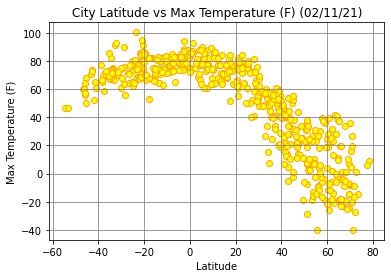

In [9]:
plt.scatter(weather_df["Lat"], weather_df["Max Temp"], edgecolors ="orange", facecolors="yellow")
plt.title("City Latitude vs Max Temperature (F) (02/11/21)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid(b=True, which = "major", axis = "both", linestyle = "-", color = "grey")

plt.savefig("output_data/Latitude vs. Temperature Plot.png")
plt.show()

#The code for Lat vs Temp plot is analyzing the dynamic tempperature change in pimarily the northern hemisphere.
#Temperature seems to stabalize at the equator which is the -10 to 10 latitude
#of course, max temperature will drop as we distance from equator

## Latitude vs. Humidity Plot

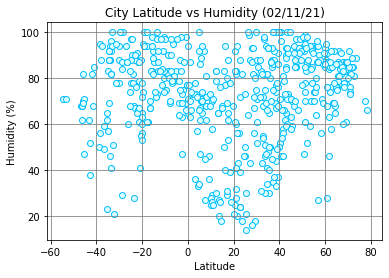

In [10]:
plt.scatter(weather_df["Lat"], weather_df["Humidity"], edgecolors ="deepskyblue", facecolors="lightcyan")
plt.title("City Latitude vs Humidity (02/11/21)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(b=True, which = "major", axis = "both", linestyle = "-", color = "grey")

plt.savefig("output_data/Latitude vs. Humidity Plot.png")
plt.show()

#this code analyzes the lat versus humidity concentration in percentage
#when the daa was run, there seems to be lower humidity in the -40 and 20 lat. 

## Latitude vs. Cloudiness Plot

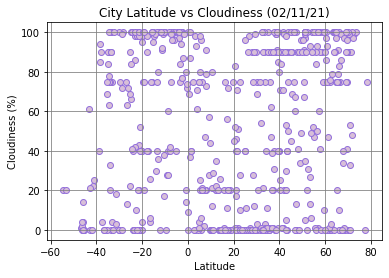

In [11]:
plt.scatter(weather_df["Lat"], weather_df["Cloudiness"], edgecolors ="mediumpurple", facecolors="thistle")
plt.title("City Latitude vs Cloudiness (02/11/21)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(b=True, which = "major", axis = "both", linestyle = "-", color = "grey")

plt.savefig("output_data/Latitude vs. Cloudiness Plot.png")
plt.show()

#this code analyzes the lat versus cloudiness
#it can be observed that the majority of the clouds are spread through the globe except for the n and s poles


## Latitude vs. Wind Speed Plot

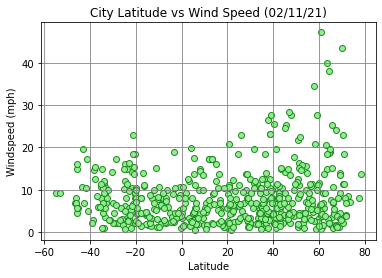

In [12]:
plt.scatter(weather_df["Lat"], weather_df["Wind Speed"], edgecolors ="forestgreen", facecolors="lightgreen")
plt.title("City Latitude vs Wind Speed (02/11/21)")
plt.xlabel("Latitude")
plt.ylabel("Windspeed (mph)")
plt.grid(b=True, which = "major", axis = "both", linestyle = "-", color = "grey")

plt.savefig("output_data/Latitude vs. Wind Speed Plot.png")
plt.show()

#this code displays the plot for wind speed and lattitude
#it can be observed that wind in mph increases as we travel north of the equator 

## Linear Regression

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is 0.765052437552883


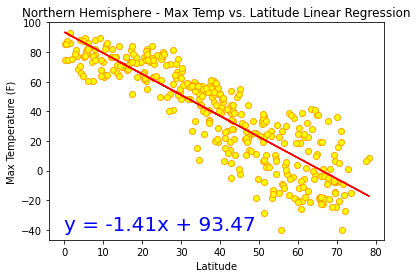

In [13]:
#islolated northern hemisphere data 
nh = weather_df.loc[weather_df["Lat"]>=0,:]

x_values = nh["Lat"]
y_values = nh["Max Temp"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)


regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values, y_values, edgecolors = "orange", facecolors = "yellow")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,-40),fontsize=20,color="blue")
plt.title("Northern Hemisphere - Max Temp vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
print("The r-value is " + str(rvalue**2))

plt.savefig("output_data/Northern Hemisphere - Max Temp (F) vs. Latitude Linear Regression.png")
plt.show()



####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is 0.2928554280397564


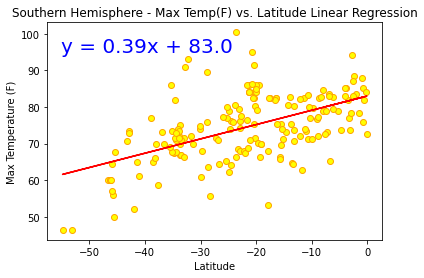

In [21]:
#islolated Southern hemisphere data 
sh = weather_df.loc[weather_df["Lat"]<0,:]

x_values = sh["Lat"]
y_values = sh["Max Temp"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values, y_values, edgecolors = "orange", facecolors = "yellow")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-55,95),fontsize=20,color="blue")
plt.title("Southern Hemisphere - Max Temp(F) vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
print("The r-value is " + str(rvalue**2))

plt.savefig("output_data/Southern Hemisphere - Max Temp vs. Latitude Linear Regression.png")
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is 0.14291242114309283


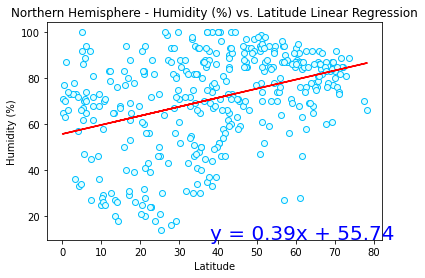

In [15]:
x_values = nh["Lat"]
y_values = nh["Humidity"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values, y_values, edgecolors ="deepskyblue", facecolors="lightcyan")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(38,10),fontsize=20,color="blue")
plt.title("Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
print("The r-value is " + str(rvalue**2))

plt.savefig("output_data/Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression.png")
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is 0.05163825327809316


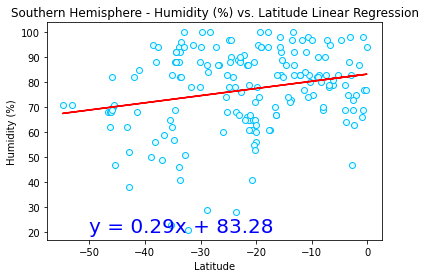

In [16]:
x_values = sh["Lat"]
y_values = sh["Humidity"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values, y_values, edgecolors ="deepskyblue", facecolors="lightcyan")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,20),fontsize=20,color="blue")
plt.title("Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
print("The r-value is " + str(rvalue**2))

plt.savefig("output_data/Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression.png")
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is 0.0806531176332666


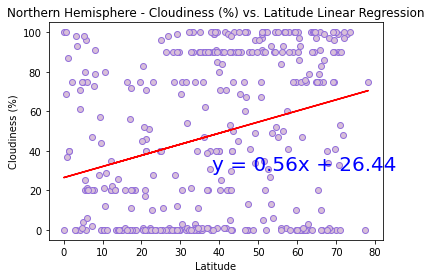

In [17]:
x_values = nh["Lat"]
y_values = nh["Cloudiness"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values, y_values, edgecolors ="mediumpurple", facecolors="thistle")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(38,30),fontsize=20,color="blue")
plt.title("Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
print("The r-value is " + str(rvalue**2))

plt.savefig("output_data/Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression.png")
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is 0.1381644400482675


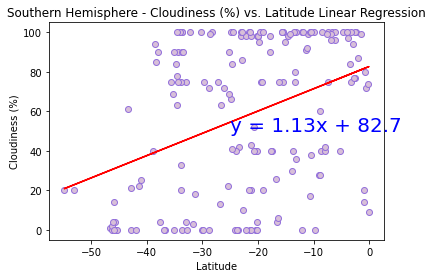

In [18]:
x_values = sh["Lat"]
y_values = sh["Cloudiness"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values, y_values, edgecolors = "mediumpurple", facecolors="thistle")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-25,50),fontsize=20,color="blue")
plt.title("Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
print("The r-value is " + str(rvalue**2))

plt.savefig("output_data/Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression.png")
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is 0.026261694169964343


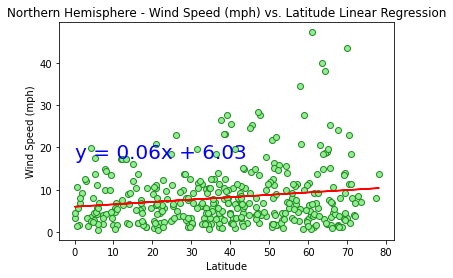

In [19]:
x_values = nh["Lat"]
y_values = nh["Wind Speed"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values, y_values, edgecolors = "forestgreen", facecolors="lightgreen")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,17.5),fontsize=20,color="blue")
plt.title("Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
print("The r-value is " + str(rvalue**2))

plt.savefig("output_data/Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression.png")
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is 0.05318230498248721


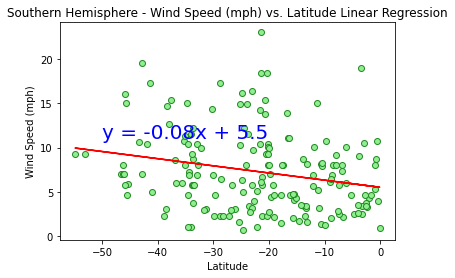

In [20]:
x_values = sh["Lat"]
y_values = sh["Wind Speed"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values, y_values, edgecolors = "forestgreen", facecolors="lightgreen")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,11),fontsize=20,color="blue")
plt.title("Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
print("The r-value is " + str(rvalue**2))

plt.savefig("output_data/Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression.png")
plt.show()